<a href="https://colab.research.google.com/github/bose9999/BritishAirwaysInsights/blob/master/British_Airways_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df.shape

(50000, 14)

In [7]:
#checking null values
df.isnull().sum()


num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [8]:
df.booking_complete.value_counts()


0    42522
1     7478
Name: booking_complete, dtype: int64

In [9]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete    
#converting the datatype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()     


In [10]:

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores
     


route                    0.056503
booking_origin           0.048081
flight_duration          0.016191
length_of_stay           0.008908
wants_extra_baggage      0.005771
wants_in_flight_meals    0.003528
num_passengers           0.002913
purchase_lead            0.002153
sales_channel            0.001516
flight_day               0.000805
wants_preferred_seat     0.000504
flight_hour              0.000193
trip_type                0.000110
Name: MI Scores, dtype: float64

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

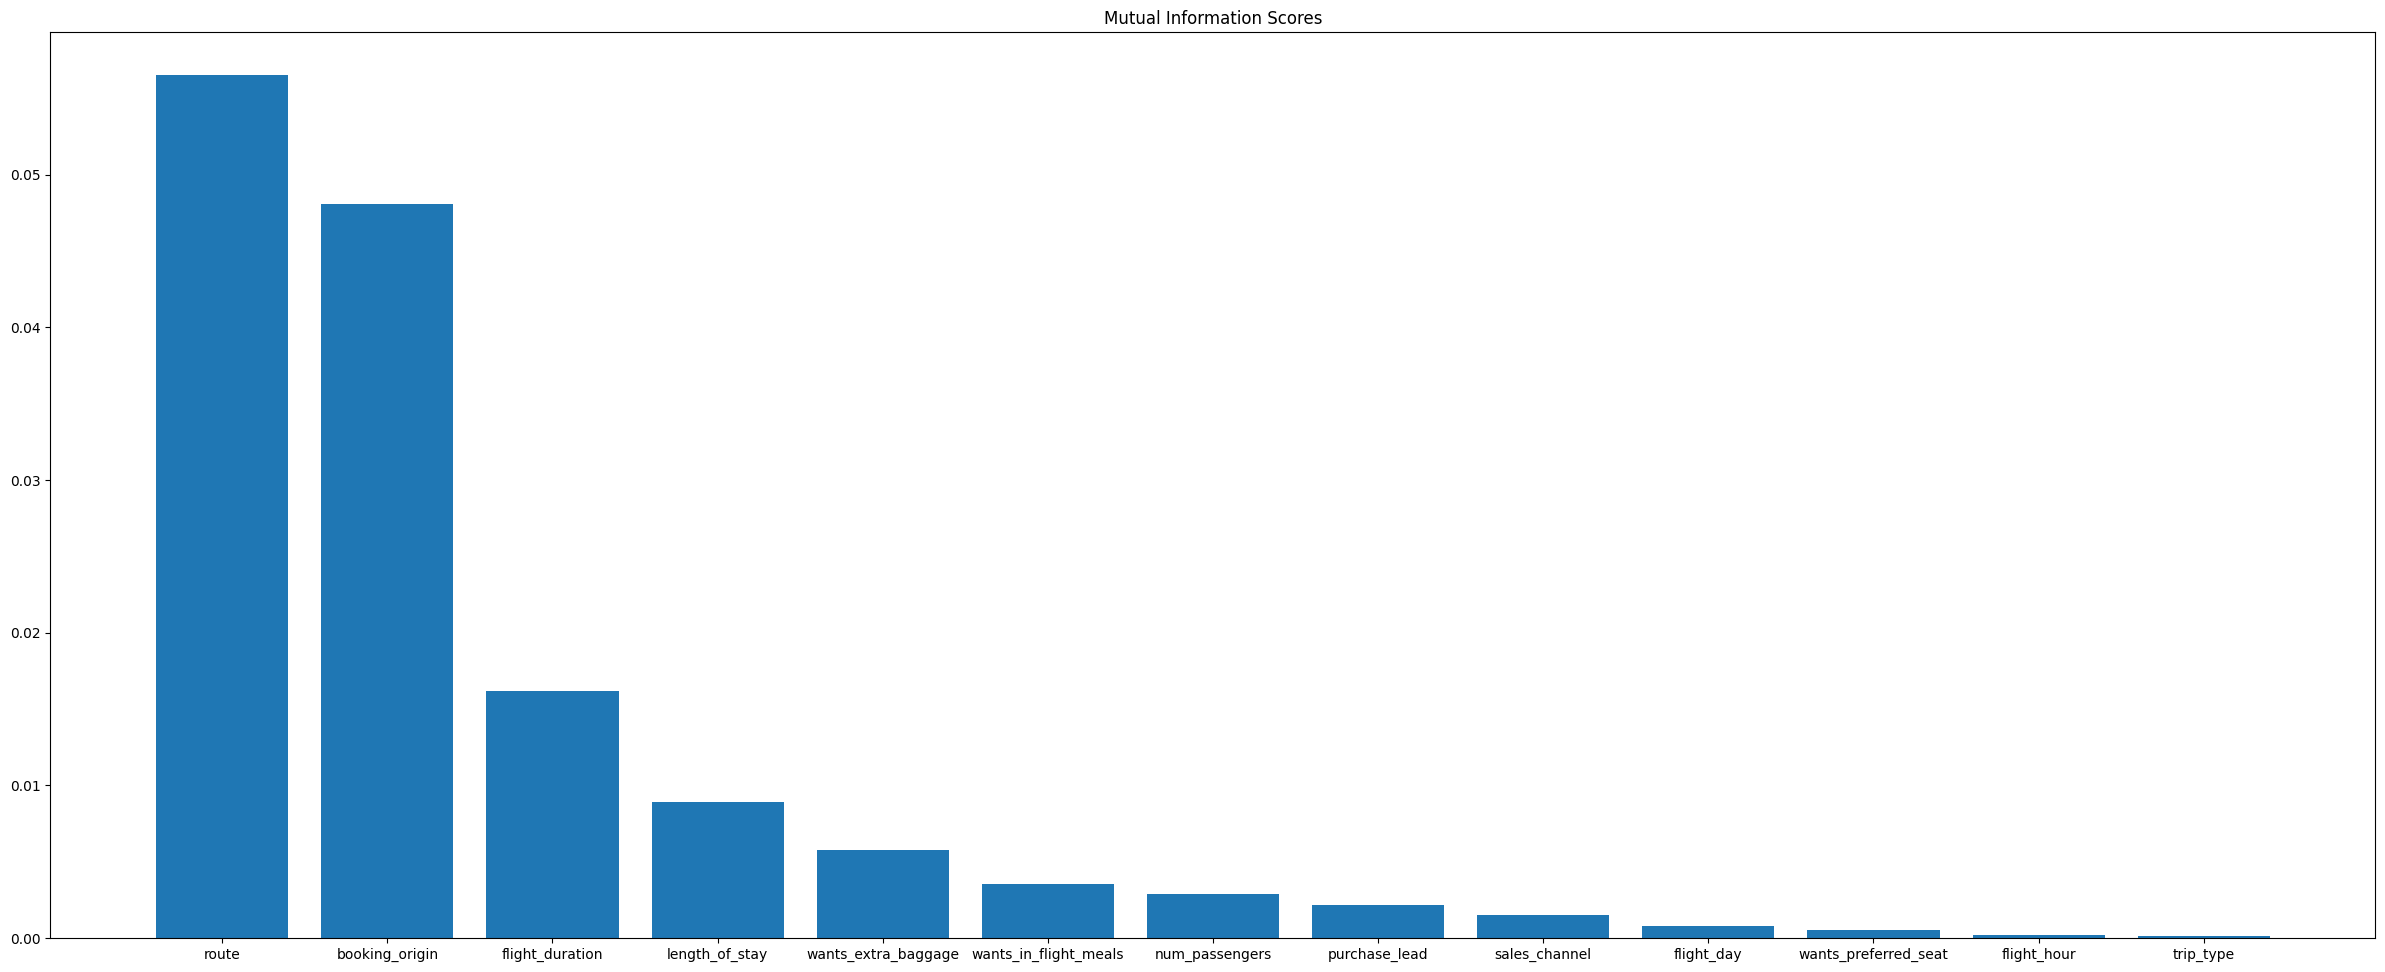

In [12]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=False)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.bar(width, scores)
    plt.xticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(30, 12))
plot_mi_scores(mi_scores)


In [13]:
#test_train_split
from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [14]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return scaler.transform(X)


In [15]:
X_train,X_val,y_train,y_val= dataset(X,y)

MODEL 1:RANDOM FOREST CLASSIFIER

In [19]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.8
AUC score:  0.5479245073780661


MODEL2:GRADIENT BOOSTING CLASSIFIER

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=1)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the validation set
preds = gb_model.predict(X_val)

# Print the accuracy and AUC score
print('ACCURACY: ', accuracy_score(y_val, preds)*100)
print('AUC score: ', roc_auc_score(y_val, preds))


ACCURACY:  84.86
AUC score:  0.5118895342521056


# MODEL3:XGBOOST CLASSIFIER

In [18]:
import xgboost as xgb


# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=1)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
preds = xgb_model.predict(X_val)

# Print the accuracy and AUC score
print('ACCURACY: ', accuracy_score(y_val, preds)*100)
print('AUC score: ', roc_auc_score(y_val, preds))


ACCURACY:  84.83000000000001
AUC score:  0.5065532363131326


## MODEL4:LOGISTIC **REGRESSION**

In [24]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_regression_model = LogisticRegression(solver='lbfgs')

# Fit the model on the training data
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the validation set
preds = logistic_regression_model.predict(X_val)

# Print the accuracy and AUC score
print('ACCURACY: ', accuracy_score(y_val, preds)*100)
print('AUC score: ', roc_auc_score(y_val, preds))


ACCURACY:  84.7
AUC score:  0.5250678090849416


## MODEL5:RANDOM FOREST CLASSIFIER ALL FEATURES

In [25]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete       

train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.2,random_state = 0)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(train_full_X, train_full_y)
preds= forest_model.predict(test_X)

print('ACCURACY: ',accuracy_score(test_y,preds)*100)
print('AUC score: ',roc_auc_score(test_y,preds))

ACCURACY:  85.08
AUC score:  0.5579923137373275


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

# create a list of models
models = [LogisticRegression(solver='lbfgs'), XGBClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]

# create a list of model names
model_names = ['Logistic Regression', 'XGBoost', 'Random Forest', 'Gradient Boosting']

# create lists to store the accuracy and auc scores
accuracies = []
aucs = []

# iterate through the models
# iterate through the models
for i, model in enumerate(models):
    # fit the model on the training data
    model.fit(X_train, y_train)
    # make predictions on the validation set
    preds = model.predict(X_val)
    # calculate the accuracy and auc score
    accuracy = accuracy_score(y_val, preds)
    auc = roc_auc_score(y_val, preds)
    # append the scores to the corresponding lists
    accuracies.append(accuracy)
    aucs.append(auc)

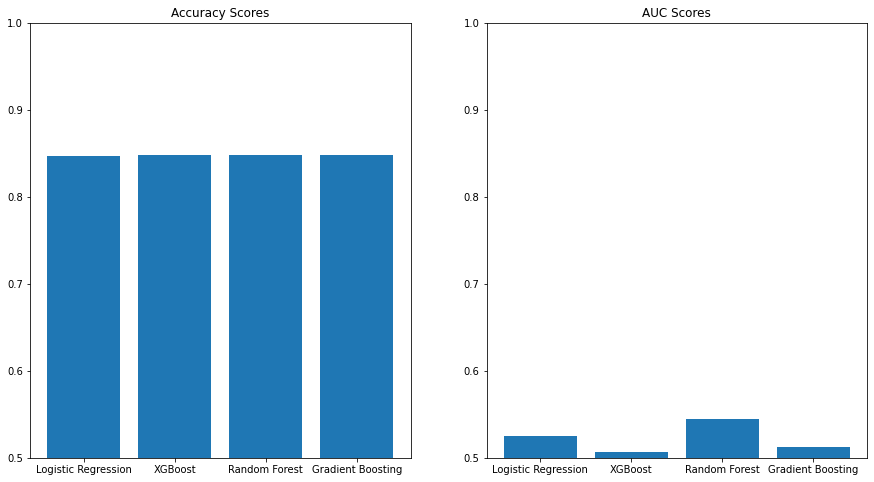

In [28]:
# create the comparison plot
plt.figure(figsize=(15, 8))

# plot the accuracy scores
plt.subplot(1, 2, 1)
plt.bar(model_names, accuracies)
plt.title('Accuracy Scores')
plt.ylim(0.5, 1)

# plot the auc scores
plt.subplot(1, 2, 2)
plt.bar(model_names, aucs)
plt.title('AUC Scores')
plt.ylim(0.5, 1)

plt.show()